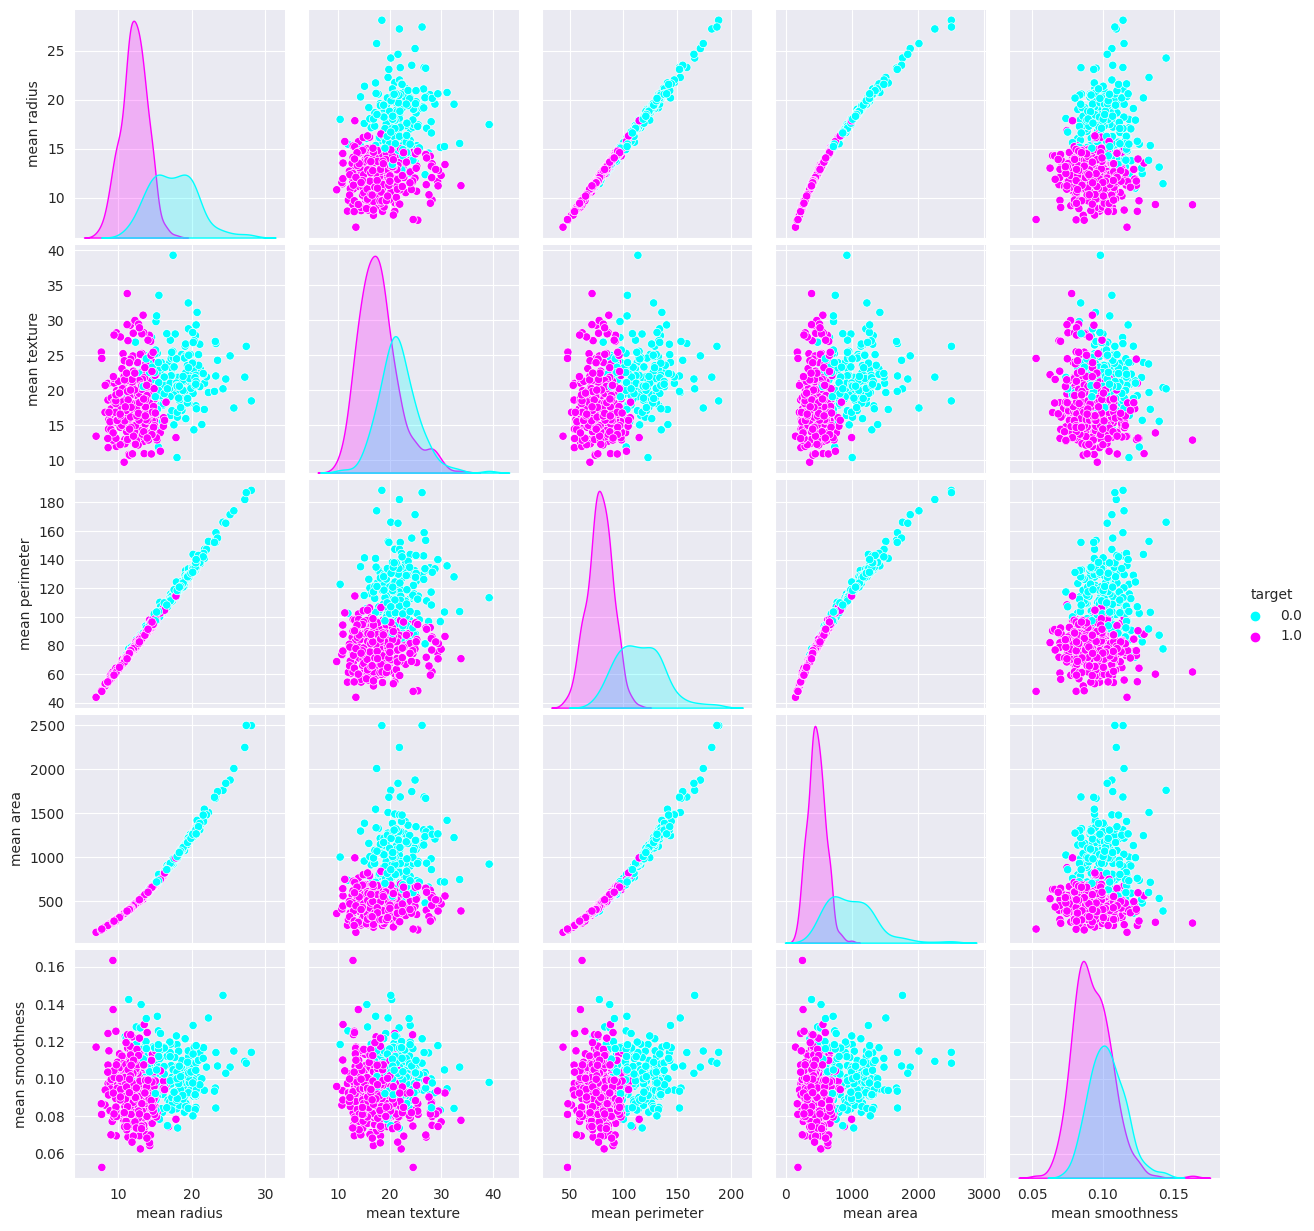

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Decision Tree Accuracy: 0.9415204678362573
Random Forest Accuracy: 0.9707602339181286
Self-Training Accuracy: 0.9415204678362573
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



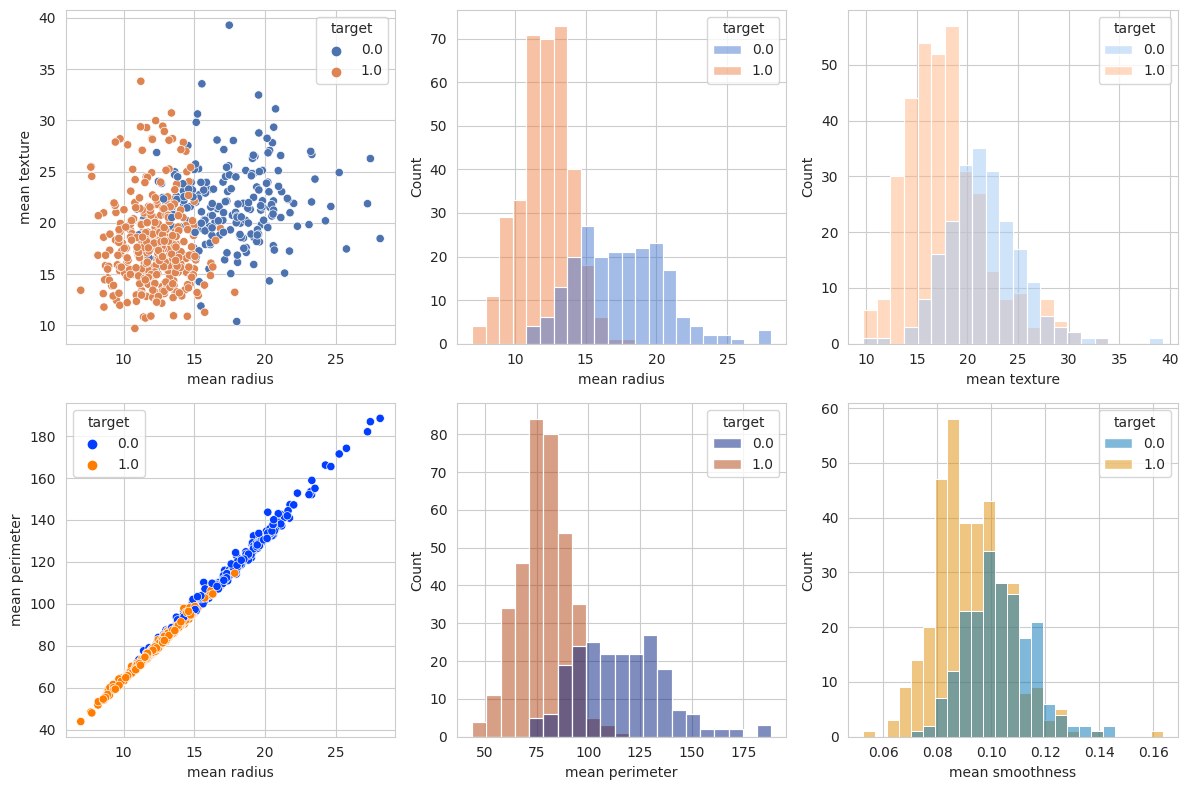

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Convert the data to a Pandas DataFrame
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                         columns = np.append(cancer['feature_names'], ['target']))

# Explore the data using Seaborn
sns.set_style('darkgrid')
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], palette=['cyan', 'magenta'])
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

# Train a decision tree classifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

# Train a random forest classifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

# Train a self-training classifier
st = SelfTrainingClassifier(DecisionTreeClassifier(), threshold = 0.9)
st.fit(X_train, y_train)

# Evaluate the classifiers
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
st_pred = st.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
st_acc = accuracy_score(y_test, st_pred)

print('Decision Tree Accuracy:', dt_acc)
print('Random Forest Accuracy:', rf_acc)
print('Self-Training Accuracy:', st_acc)

# Print classification report for decision tree classifier
print('Classification Report - Decision Tree')
print(classification_report(y_test, dt_pred))

# Print classification report for random forest classifier
print('Classification Report - Random Forest')
print(classification_report(y_test, rf_pred))

# Visualize the data using scatterplot and histogram
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
sns.scatterplot(data=df_cancer, x='mean radius', y='mean texture', hue='target', palette='deep', ax=axs[0,0])
sns.histplot(data=df_cancer, x='mean radius', hue='target', palette='muted', ax=axs[0,1])
sns.histplot(data=df_cancer, x='mean texture', hue='target', palette='pastel', ax=axs[0,2])
sns.scatterplot(data=df_cancer, x='mean radius', y='mean perimeter', hue='target', palette='bright', ax=axs[1,0])
sns.histplot(data=df_cancer, x='mean perimeter', hue='target', palette='dark', ax=axs[1,1])
sns.histplot(data=df_cancer, x='mean smoothness', hue='target', palette='colorblind', ax=axs[1,2])
fig.tight_layout()
plt.show()
